 <a id='up'>

# The number of home burglaries at NYC

The aim of this Forecasting is to predict the number of home burglaries at Precinct no. 44 of NYC that will take place
during the first 3 months of 2018 (these months are not part of this dataset).

[Part 1: EDA and Data cleansing](#part1)
    
  * 1.1.[Load libraries](#load-libraries)   
  * 1.2.[Load the data](#load-data)    
  * 1.3.[ Missing_values](#Missing)
  * 1.4.[Missing values processing](#Missing_processing)
  * 1.5.[Missing values visualization](#Missing_visualization)


[Part 2: Visualization and analysis of results</a>](#part2)

  * 2.1. [Geographic location](#Geographic_visualization)
  * 2.2. [Offender groups analysis](#Offender_groups)
  * 2.3. [Daytime analysis](#Daytime) 

In this chapter I want to understand and visualize data

## <a id='part1'>Part 1: EDA and Data cleansing</a>

### <a id='load-libraries'>1.1 Load libraries</a>

In [1]:
# Load libraries
import numpy as np 
import pandas as pd 
from subprocess import check_output
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
import matplotlib
matplotlib.style.use('ggplot')

In this project we will use data from the https://data.cityofnewyork.us, it is a New York City open data portal.
We filtered only only home burglaries in all new york and only in the area that interests us.

### <a id='load-data'>1.2 Load the data</a>

In [2]:
# Data Import
home_bur_NY = pd.read_csv("Home burglaries_at_NYC.csv")
home_bur_44 = pd.read_csv("Home burglaries at Precinct no. 44.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,20,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
home_bur_NY.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,679870027,12/31/2018,04:30:00,12/31/2018,04:35:00,34.0,12/31/2018,107,BURGLARY,223,...,U,NaN,40.853659,-73.935745,"(40.853658996, -73.935745043)",PATROL BORO MAN NORTH,NaN,45-64,WHITE,F
1,861311307,12/31/2018,19:45:00,12/31/2018,19:50:00,120.0,12/31/2018,107,BURGLARY,223,...,M,NaN,40.621006,-74.098039,"(40.621006434, -74.098038517)",PATROL BORO STATEN ISLAND,NaN,25-44,BLACK,F
2,908148337,12/31/2018,02:50:00,NaN,NaN,90.0,12/31/2018,107,BURGLARY,223,...,NaN,NaN,40.704207,-73.950738,"(40.704207255, -73.950737797)",PATROL BORO BKLYN NORTH,NaN,25-44,WHITE,F
3,612305910,12/31/2018,09:30:00,12/31/2018,10:50:00,105.0,12/31/2018,107,BURGLARY,221,...,F,NaN,40.708925,-73.747234,"(40.708924781, -73.747234264)",PATROL BORO QUEENS SOUTH,NaN,25-44,BLACK,M
4,585990858,12/31/2018,12:00:00,12/31/2018,15:05:00,47.0,12/31/2018,107,BURGLARY,221,...,M,NaN,40.894634,-73.858395,"(40.894634176, -73.858395352)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F


In [4]:
home_bur_44.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,655214992,12/17/2018,20:30:00,NaN,NaN,44,12/17/2018,107,BURGLARY,223,...,M,NaN,40.831581,-73.927708,"(40.831581289, -73.927708067)",PATROL BORO BRONX,NaN,25-44,UNKNOWN,F
1,555518816,12/16/2018,19:50:00,12/16/2018,19:55:00,44,12/16/2018,107,BURGLARY,223,...,M,NaN,40.842979,-73.914580,"(40.842979335, -73.914579729)",PATROL BORO BRONX,NaN,25-44,BLACK,F
2,996954795,12/12/2018,02:56:00,12/12/2018,04:11:00,44,12/12/2018,107,BURGLARY,223,...,U,NaN,40.834503,-73.913373,"(40.834502766, -73.91337278)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,D
3,314628661,12/12/2018,02:56:00,12/12/2018,04:11:00,44,12/12/2018,107,BURGLARY,223,...,M,NaN,40.834503,-73.913373,"(40.834502766, -73.91337278)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,D
4,880908751,12/08/2018,04:30:00,NaN,NaN,44,12/08/2018,107,BURGLARY,223,...,M,NaN,40.843714,-73.917503,"(40.8437143, -73.91750271)",PATROL BORO BRONX,NaN,65+,WHITE HISPANIC,M


In [5]:
home_bur_NY.shape, home_bur_44.shape

((160414, 35), (2726, 35))

In the first part of this is project i want to explore this dataset.

In [6]:
home_bur_NY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160414 entries, 0 to 160413
Data columns (total 35 columns):
CMPLNT_NUM           160414 non-null int64
CMPLNT_FR_DT         160395 non-null object
CMPLNT_FR_TM         160413 non-null object
CMPLNT_TO_DT         146879 non-null object
CMPLNT_TO_TM         146987 non-null object
ADDR_PCT_CD          160391 non-null float64
RPT_DT               160414 non-null object
KY_CD                160414 non-null int64
OFNS_DESC            160414 non-null object
PD_CD                160414 non-null int64
PD_DESC              160414 non-null object
CRM_ATPT_CPTD_CD     160414 non-null object
LAW_CAT_CD           160414 non-null object
BORO_NM              160277 non-null object
LOC_OF_OCCUR_DESC    159790 non-null object
PREM_TYP_DESC        160115 non-null object
JURIS_DESC           160414 non-null object
JURISDICTION_CODE    160414 non-null int64
PARKS_NM             10 non-null object
HADEVELOPT           2803 non-null object
HOUSING_PSA       

In [7]:
home_bur_44.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2726 entries, 0 to 2725
Data columns (total 35 columns):
CMPLNT_NUM           2726 non-null int64
CMPLNT_FR_DT         2726 non-null object
CMPLNT_FR_TM         2726 non-null object
CMPLNT_TO_DT         2100 non-null object
CMPLNT_TO_TM         2100 non-null object
ADDR_PCT_CD          2726 non-null int64
RPT_DT               2726 non-null object
KY_CD                2726 non-null int64
OFNS_DESC            2726 non-null object
PD_CD                2726 non-null int64
PD_DESC              2726 non-null object
CRM_ATPT_CPTD_CD     2726 non-null object
LAW_CAT_CD           2726 non-null object
BORO_NM              2723 non-null object
LOC_OF_OCCUR_DESC    2718 non-null object
PREM_TYP_DESC        2725 non-null object
JURIS_DESC           2726 non-null object
JURISDICTION_CODE    2726 non-null int64
PARKS_NM             2 non-null object
HADEVELOPT           63 non-null object
HOUSING_PSA          77 non-null object
X_COORD_CD           27

[Up to the header](#up)

### <a id='Missing'>1.3  Missing values</a>

In [8]:
# Function to calculate missing values by column
def missing_values_table(home_bur_NY):
        # Total missing values
        mis_val = home_bur_NY.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * home_bur_NY.isnull().sum() / len(home_bur_NY)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(home_bur_NY.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
missing_values_table(home_bur_NY)

Your selected dataframe has 35 columns.
There are 25 columns that have missing values.


,Missing Values,% of Total Values
PARKS_NM,160404,100.0
STATION_NAME,160404,100.0
TRANSIT_DISTRICT,160404,100.0
HADEVELOPT,157611,98.3
HOUSING_PSA,156229,97.4
SUSP_AGE_GROUP,142719,89.0
SUSP_SEX,115390,71.9
SUSP_RACE,108867,67.9
VIC_AGE_GROUP,15747,9.8
CMPLNT_TO_DT,13535,8.4


In [10]:
home_bur_NY.LOC_OF_OCCUR_DESC.unique()

array(['INSIDE', 'REAR OF', 'FRONT OF', 'OPPOSITE OF', nan], dtype=object)

In [11]:
home_bur_NY.PREM_TYP_DESC.unique()

array(['RESIDENCE - APT. HOUSE', 'RESIDENCE-HOUSE',
       'RESIDENCE - PUBLIC HOUSING', nan, 'BEAUTY & NAIL SALON',
       'COMMERCIAL BUILDING', 'OTHER', 'CONSTRUCTION SITE', 'HOTEL/MOTEL',
       'RESTAURANT/DINER', 'PUBLIC BUILDING', 'ABANDONED BUILDING',
       'PARKING LOT/GARAGE (PRIVATE)', 'STREET', 'MAILBOX INSIDE',
       'TRANSIT - NYC SUBWAY', 'SYNAGOGUE', 'SOCIAL CLUB/POLICY',
       'CHURCH', 'HOSPITAL', 'PUBLIC SCHOOL', 'GYM/FITNESS FACILITY',
       'PRIVATE/PAROCHIAL SCHOOL', 'CLOTHING/BOUTIQUE',
       'DEPARTMENT STORE', 'FACTORY/WAREHOUSE', 'BAR/NIGHT CLUB',
       'FAST FOOD', 'PARKING LOT/GARAGE (PUBLIC)', 'DRUG STORE',
       'LIQUOR STORE', 'OPEN AREAS (OPEN LOTS)', 'TELECOMM. STORE',
       'GROCERY/BODEGA', 'STORE UNCLASSIFIED', 'FOOD SUPERMARKET',
       'DOCTOR/DENTIST OFFICE', 'SMALL MERCHANT', 'DRY CLEANER/LAUNDRY',
       'CANDY STORE', 'TRANSIT FACILITY (OTHER)', 'ATM',
       'CHECK CASHING BUSINESS', 'PARK/PLAYGROUND', 'CHAIN STORE',
       'MOSQUE', '

In [12]:
home_bur_NY.BORO_NM.unique()

array(['MANHATTAN', 'STATEN ISLAND', 'BROOKLYN', 'QUEENS', 'BRONX', nan],
      dtype=object)

In [13]:
home_bur_NY.PATROL_BORO.unique()

array(['PATROL BORO MAN NORTH', 'PATROL BORO STATEN ISLAND',
       'PATROL BORO BKLYN NORTH', 'PATROL BORO QUEENS SOUTH',
       'PATROL BORO BRONX', 'PATROL BORO BKLYN SOUTH',
       'PATROL BORO MAN SOUTH', 'PATROL BORO QUEENS NORTH', nan],
      dtype=object)

In [14]:
home_bur_NY.ADDR_PCT_CD.unique()

array([ 34., 120.,  90., 105.,  47., 107.,  71.,  32.,  13.,  28.,  68.,
         7.,  81.,  70.,  73., 109.,  25.,  78., 114.,  17., 115.,  88.,
        75.,  66.,  60.,  24.,  52., 121.,  30.,  62.,  40.,  43., 110.,
        67.,  20.,  83.,  61.,  26.,  18.,  72.,  19.,  42., 113., 102.,
        48.,  33.,  46., 122.,  63.,  76.,  49., 112.,  84., 101.,   9.,
        23.,  45., 106.,   1., 111.,  79.,   5.,  10., 104.,  14.,  69.,
       100.,  94.,  44.,  50.,   6.,  77., 103., 123.,  41., 108.,  22.,
        nan])

In [15]:
home_bur_NY.PD_DESC.unique()

array(['BURGLARY,RESIDENCE,NIGHT', 'BURGLARY,RESIDENCE,DAY',
       'BURGLARY,RESIDENCE,UNKNOWN TIM'], dtype=object)

In [16]:
#for check
home_bur_44.ADDR_PCT_CD.unique()

array([44], dtype=int64)

[Up to the header](#up)

### <a id='Missing_processing'>1.4  Missing values processing</a>

I immediately decide to remove variables in which more than ninety percent of the values are zeros.Of course I analyze the importance of variables before deleting

In [17]:
home_bur_NY.drop(['PARKS_NM', 'STATION_NAME', 'TRANSIT_DISTRICT', 'HADEVELOPT', 'HOUSING_PSA', 'Y_COORD_CD','X_COORD_CD'], inplace=True, axis=1)

In [18]:
home_bur_44.drop(['PARKS_NM', 'STATION_NAME', 'TRANSIT_DISTRICT', 'HADEVELOPT', 'HOUSING_PSA', 'Y_COORD_CD','X_COORD_CD'], inplace=True, axis=1)

I deleted the information about the type of crime because I make a forecast only for the one kind of crime. And duplicate location information because we have them in the word coordinate system(WGS 1984)

In [19]:
home_bur_NY.drop(['KY_CD','OFNS_DESC'], inplace=True, axis=1)

In [20]:
home_bur_44.drop(['KY_CD','OFNS_DESC','ADDR_PCT_CD'], inplace=True, axis=1)

In [21]:
home_bur_NY.shape, home_bur_44.shape

((160414, 26), (2726, 25))

In [22]:
home_bur_NY['CMPLNT_TO_DT'].fillna(home_bur_NY['CMPLNT_FR_DT'], axis = 0, inplace = True)

In [23]:
home_bur_44['CMPLNT_TO_DT'].fillna(home_bur_44['CMPLNT_FR_DT'], axis = 0, inplace = True)

In [24]:
home_bur_NY['CMPLNT_FR_DT'].fillna(home_bur_NY['CMPLNT_TO_DT'], axis = 0, inplace = True)

In [25]:
home_bur_44['CMPLNT_FR_DT'].fillna(home_bur_44['CMPLNT_TO_DT'], axis = 0, inplace = True)

To avoid meaning "NaN" in "CMPLNT_TO_DT" and "CMPLNT_FR_DT" variadls,we replace them with each other.

I remind the meaning of these variables to explain this action:CMPLNT_FR_DT Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)
CMPLNT_TO_DT Ending date of occurrence for the reported event, if exact time of occurrence is unknown

In [26]:
# Find jurisdiction codes for all jurisdictions responsible for incident
juris_desc = home_bur_NY[['JURISDICTION_CODE', 'JURIS_DESC']].drop_duplicates(subset = 'JURIS_DESC', keep = 'first').reset_index(drop = True)
juris_desc.rename(columns = {'JURIS_DESC' : 'JUR_NAME'}, inplace = True) #change column name
print(juris_desc)

    JURISDICTION_CODE                      JUR_NAME
0                   0              N.Y. POLICE DEPT
1                   2           N.Y. HOUSING POLICE
2                   3                PORT AUTHORITY
3                   1           N.Y. TRANSIT POLICE
4                  97                         OTHER
5                  85      NYS DEPT TAX AND FINANCE
6                  15                   METRO NORTH
7                  11             N.Y. STATE POLICE
8                  69               POLICE DEPT NYC
9                  14            HEALTH & HOSP CORP
10                  9          STATN IS RAPID TRANS
11                 87  NEW YORK CITY SHERIFF OFFICE
12                 16          SEA GATE POLICE DEPT
13                 13              U.S. PARK POLICE


In [27]:
# Find jurisdiction codes for all jurisdictions responsible for incident
juris_desc = home_bur_44[['JURISDICTION_CODE', 'JURIS_DESC']].drop_duplicates(subset = 'JURIS_DESC', keep = 'first').reset_index(drop = True)
juris_desc.rename(columns = {'JURIS_DESC' : 'JUR_NAME'}, inplace = True) #change column name
print(juris_desc)

   JURISDICTION_CODE             JUR_NAME
0                  0     N.Y. POLICE DEPT
1                  2  N.Y. HOUSING POLICE


In [28]:
# Fill NaN values with some number (different from any JURISDICTION_CODE).
home_bur_NY['JURISDICTION_CODE'].fillna(5, inplace = True)

# Replacement of filled NaNs values with appropriate numbers.
# I don`t understand how below line exactly works, but I found similar solution on the web (and can`t find source again to analyze).
home_bur_NY['JURISDICTION_CODE'] = home_bur_NY['JURISDICTION_CODE'] \
                              .mask(home_bur_NY['JURISDICTION_CODE'] == 5, home_bur_NY['JURIS_DESC'] \
                              .map(juris_desc.set_index('JUR_NAME')['JURISDICTION_CODE']))

In [29]:
home_bur_NY.JURISDICTION_CODE.unique()

array([ 0,  2,  3,  1, 97, 85, 15, 11, 69, 14,  9, 87, 16, 13],
      dtype=int64)

In [30]:
missing_values_table(home_bur_NY)

Your selected dataframe has 26 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
SUSP_AGE_GROUP,142719,89.0
SUSP_SEX,115390,71.9
SUSP_RACE,108867,67.9
VIC_AGE_GROUP,15747,9.8
CMPLNT_TO_TM,13427,8.4
LOC_OF_OCCUR_DESC,624,0.4
Latitude,484,0.3
Longitude,484,0.3
Lat_Lon,484,0.3
PREM_TYP_DESC,299,0.2


Still, we have zero values but I decided that I will group the data by time and in the forecast I will not use data on each specific crime,lika personal information about the suspect and the victim as: 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'.

[Up to the header](#up)

### <a id='Missing_visualization'>1.5  Missing values visualization</a>

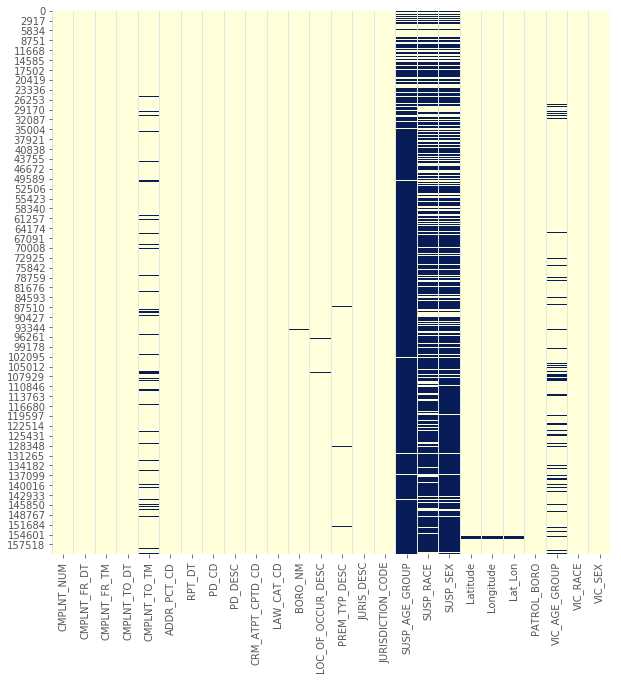

In [31]:
# Let's see how many null elements are contained in the data
plt.figure(figsize=(10,10))
sns.heatmap(home_bur_NY.isnull(), cbar = False, cmap = 'YlGnBu')

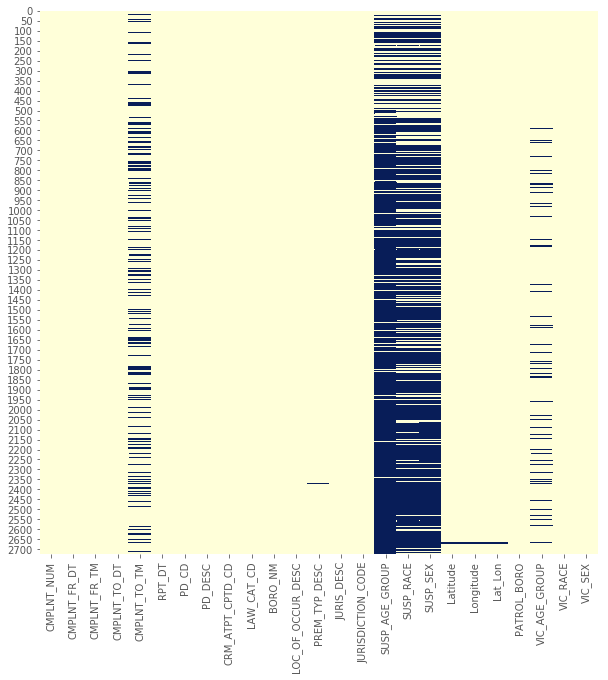

In [32]:
# Let's see how many null elements are contained in the data
plt.figure(figsize=(10,10))
sns.heatmap(home_bur_44.isnull(), cbar = False, cmap = 'YlGnBu')

In [33]:
home_bur_NY.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'PD_CD', 'PD_DESC',
       'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM', 'LOC_OF_OCCUR_DESC',
       'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'Latitude', 'Longitude', 'Lat_Lon',
       'PATROL_BORO', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [34]:
#home_bur_NY = home_bur_NY.replace(np.nan, 0)

In [35]:
home_bur_NY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160414 entries, 0 to 160413
Data columns (total 26 columns):
CMPLNT_NUM           160414 non-null int64
CMPLNT_FR_DT         160414 non-null object
CMPLNT_FR_TM         160413 non-null object
CMPLNT_TO_DT         160414 non-null object
CMPLNT_TO_TM         146987 non-null object
ADDR_PCT_CD          160391 non-null float64
RPT_DT               160414 non-null object
PD_CD                160414 non-null int64
PD_DESC              160414 non-null object
CRM_ATPT_CPTD_CD     160414 non-null object
LAW_CAT_CD           160414 non-null object
BORO_NM              160277 non-null object
LOC_OF_OCCUR_DESC    159790 non-null object
PREM_TYP_DESC        160115 non-null object
JURIS_DESC           160414 non-null object
JURISDICTION_CODE    160414 non-null int64
SUSP_AGE_GROUP       17695 non-null object
SUSP_RACE            51547 non-null object
SUSP_SEX             45024 non-null object
Latitude             159930 non-null float64
Longitude    

In [36]:
#home_bur_44 = home_bur_44.replace(np.nan, 0)

In [37]:
home_bur_44.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2726 entries, 0 to 2725
Data columns (total 25 columns):
CMPLNT_NUM           2726 non-null int64
CMPLNT_FR_DT         2726 non-null object
CMPLNT_FR_TM         2726 non-null object
CMPLNT_TO_DT         2726 non-null object
CMPLNT_TO_TM         2100 non-null object
RPT_DT               2726 non-null object
PD_CD                2726 non-null int64
PD_DESC              2726 non-null object
CRM_ATPT_CPTD_CD     2726 non-null object
LAW_CAT_CD           2726 non-null object
BORO_NM              2723 non-null object
LOC_OF_OCCUR_DESC    2718 non-null object
PREM_TYP_DESC        2725 non-null object
JURIS_DESC           2726 non-null object
JURISDICTION_CODE    2726 non-null int64
SUSP_AGE_GROUP       392 non-null object
SUSP_RACE            683 non-null object
SUSP_SEX             660 non-null object
Latitude             2717 non-null float64
Longitude            2717 non-null float64
Lat_Lon              2717 non-null object
PATROL_BORO    

In [38]:
#for check
home_bur_NY[home_bur_NY.PD_CD ==224]

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,...,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,Lat_Lon,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
33,889644683,12/29/2018,12:00:00,12/31/2018,08:00:00,120.0,12/31/2018,224,"BURGLARY,RESIDENCE,UNKNOWN TIM",COMPLETED,...,NaN,NaN,NaN,40.634126,-74.116144,"(40.634126145, -74.116144326)",PATROL BORO STATEN ISLAND,UNKNOWN,UNKNOWN,D
44,854516351,12/28/2018,11:00:00,12/29/2018,02:00:00,43.0,12/29/2018,224,"BURGLARY,RESIDENCE,UNKNOWN TIM",COMPLETED,...,NaN,NaN,NaN,40.826651,-73.867895,"(40.826650923, -73.867894916)",PATROL BORO BRONX,45-64,BLACK,F
46,282618319,12/28/2018,10:00:00,12/29/2018,00:45:00,110.0,12/29/2018,224,"BURGLARY,RESIDENCE,UNKNOWN TIM",COMPLETED,...,UNKNOWN,UNKNOWN,U,40.739614,-73.849213,"(40.739614308, -73.84921254)",PATROL BORO QUEENS NORTH,45-64,ASIAN / PACIFIC ISLANDER,F
54,397056308,12/27/2018,14:30:00,12/29/2018,15:00:00,61.0,12/29/2018,224,"BURGLARY,RESIDENCE,UNKNOWN TIM",COMPLETED,...,NaN,NaN,NaN,40.580840,-73.939629,"(40.580840309, -73.939629129)",PATROL BORO BKLYN SOUTH,45-64,WHITE,M
55,881222396,12/27/2018,15:30:00,12/27/2018,23:30:00,26.0,12/27/2018,224,"BURGLARY,RESIDENCE,UNKNOWN TIM",COMPLETED,...,NaN,NaN,NaN,40.809780,-73.954272,"(40.809779856, -73.954272064)",PATROL BORO MAN NORTH,25-44,WHITE,F
64,164332258,12/27/2018,10:30:00,12/29/2018,09:40:00,40.0,12/29/2018,224,"BURGLARY,RESIDENCE,UNKNOWN TIM",COMPLETED,...,UNKNOWN,WHITE HISPANIC,F,40.817537,-73.927694,"(40.81753656, -73.92769442)",PATROL BORO BRONX,25-44,BLACK,M
70,907927861,12/26/2018,11:00:00,12/26/2018,21:30:00,70.0,12/27/2018,224,"BURGLARY,RESIDENCE,UNKNOWN TIM",ATTEMPTED,...,UNKNOWN,UNKNOWN,U,40.610260,-73.959984,"(40.610259726, -73.959984009)",PATROL BORO BKLYN SOUTH,65+,WHITE,F
79,531034744,12/26/2018,15:00:00,12/26/2018,21:30:00,122.0,12/26/2018,224,"BURGLARY,RESIDENCE,UNKNOWN TIM",COMPLETED,...,NaN,NaN,NaN,40.603898,-74.118890,"(40.603897654, -74.118889922)",PATROL BORO STATEN ISLAND,18-24,WHITE,M
98,881421835,12/24/2018,22:30:00,12/27/2018,18:00:00,49.0,12/28/2018,224,"BURGLARY,RESIDENCE,UNKNOWN TIM",COMPLETED,...,NaN,NaN,NaN,40.851293,-73.852133,"(40.851293043, -73.852133047)",PATROL BORO BRONX,65+,WHITE,F
103,808668044,12/24/2018,19:00:00,12/29/2018,14:00:00,25.0,12/29/2018,224,"BURGLARY,RESIDENCE,UNKNOWN TIM",COMPLETED,...,NaN,NaN,NaN,40.808600,-73.937598,"(40.808600041, -73.937598323)",PATROL BORO MAN NORTH,25-44,ASIAN / PACIFIC ISLANDER,M


[Up to the header](#up)

## <a id='part2'>Part 2: Visualization and analysis of results</a>

### <a id='Geographic_visualization'>2.1  Geographic location analysis</a>

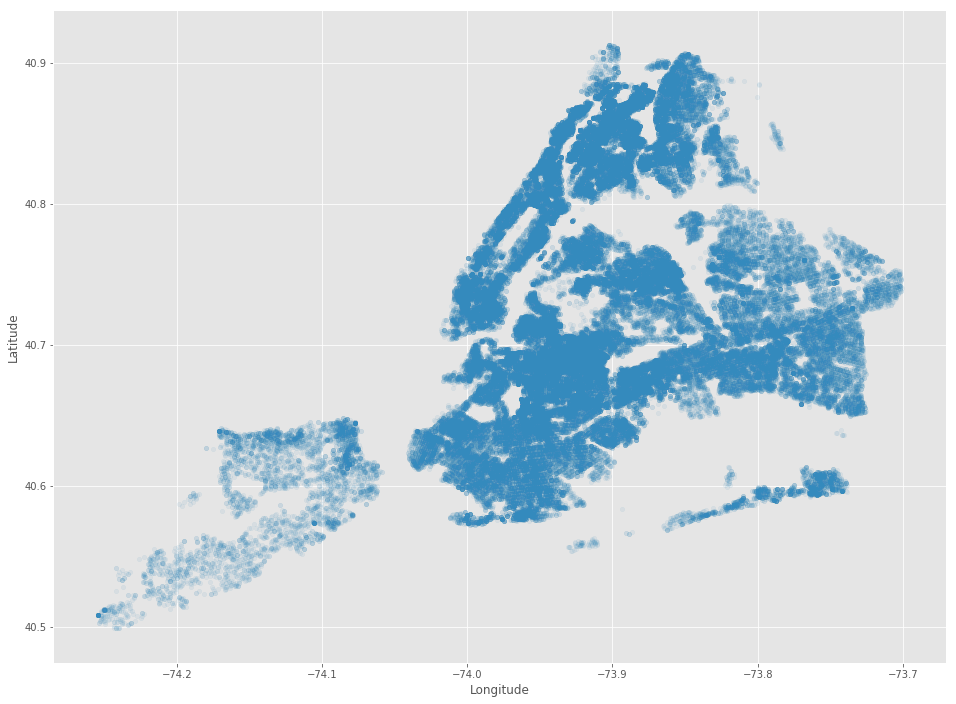

In [39]:
# Quick plot for data check
home_bur_NY.plot(kind = 'scatter', x = 'Longitude', y = 'Latitude', marker = 'o', alpha = 0.08,figsize = (16,12));

Analysis of the number of home burglaries in New York city by districts.My forecasting quarter(no.44) is located in the Queens area. And if this factor is important for you, I would recommend an apartment in the Staten island area.

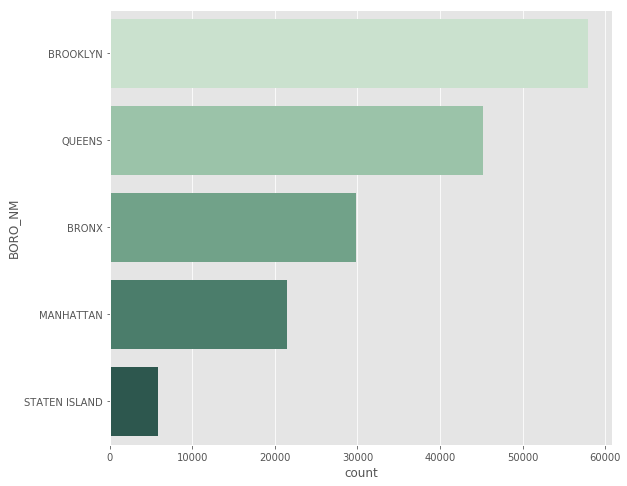

In [40]:
plt.figure(figsize = (9, 8))
sns.countplot(y= 'BORO_NM', data = home_bur_NY, palette ="ch:2.5,-.2,dark=.3",order = home_bur_NY['BORO_NM'].value_counts().index,color= 'g' )

In [41]:
Queens = home_bur_NY[home_bur_NY.BORO_NM == 'QUEENS']

In [42]:
Queens = home_bur_NY[home_bur_NY.BORO_NM == 'QUEENS']

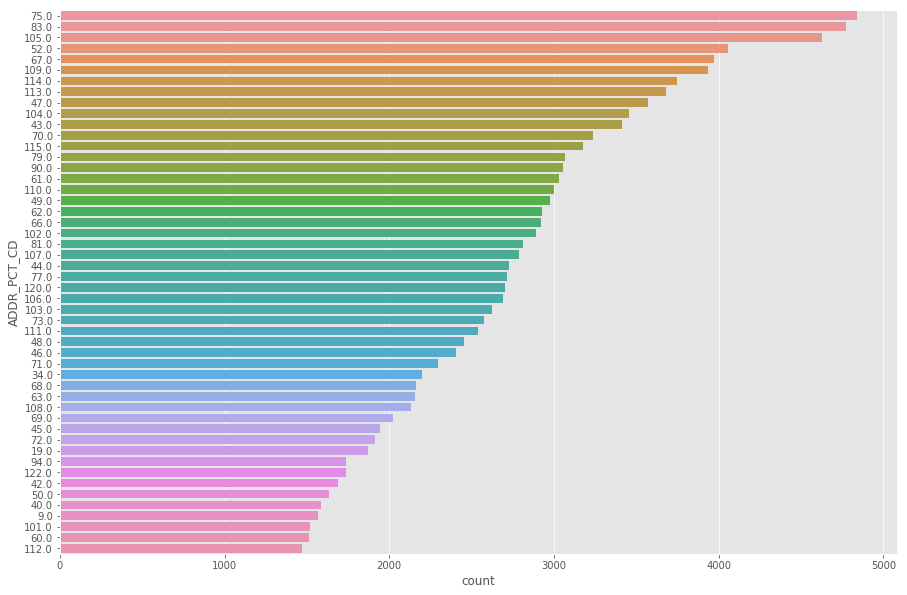

In [43]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'ADDR_PCT_CD', data = home_bur_NY, order = home_bur_NY['ADDR_PCT_CD'].value_counts().iloc[:50].index)

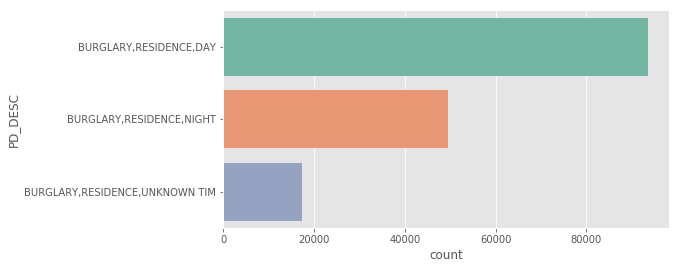

In [44]:
plt.figure(figsize = (8, 4))
sns.countplot(y= 'PD_DESC', data = home_bur_NY,palette="Set2", order = home_bur_NY['PD_DESC'].value_counts().index )

<Figure size 504x432 with 0 Axes>

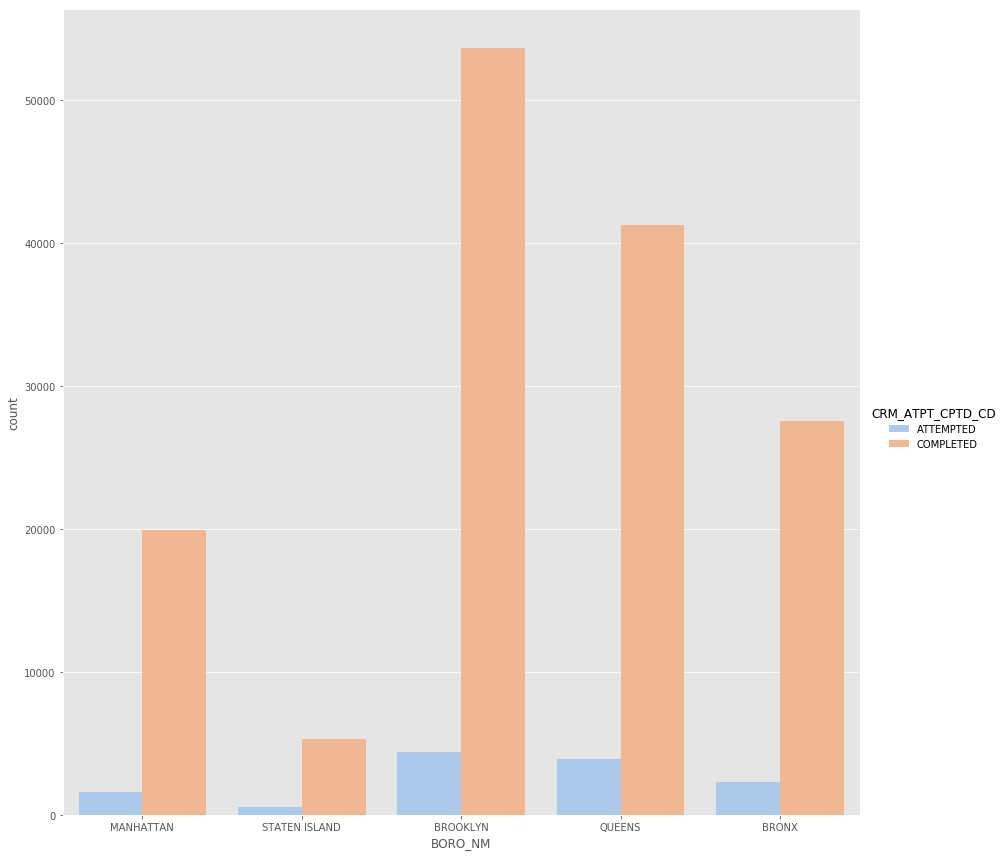

In [45]:
fig = plt.figure(figsize=(7,6))
ax = sns.catplot(x="BORO_NM", hue="CRM_ATPT_CPTD_CD", kind="count",data=home_bur_NY, height=12, palette="pastel")

In [46]:
BB = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')

# load extra image to zoom in on NYC
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')

In [47]:
# this function will be used more often to plot data on the NYC map
def plot_on_map(home_bur_44, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(home_bur_44.Longitude, home_bur_44.Latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_title('locations 44')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(home_bur_NY.Longitude, home_bur_NY.Latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_title('locations NYC')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

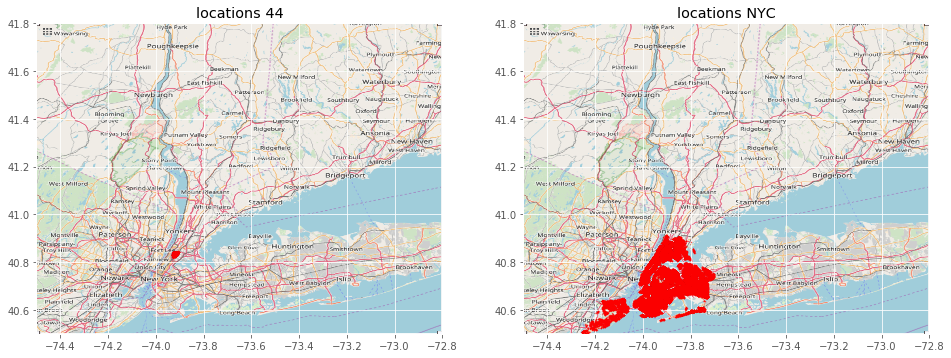

In [48]:
plot_on_map(home_bur_44, BB, nyc_map, s=1, alpha=0.3)

[Up to the header](#up)

### <a id='Offender_groups'>2.2 Offender groups analysis</a>

  I do not plan to use this data in forecasting, but it was interesting for me to make a simple visualization to understand the representatives of which population groups most often commit such crimes. We can see that in the all New York City, and  In the Bronx area, and in quarter number 44, the distribution of data among groups has the same character. it’s not so important that there a big percentage of the data is missing and unknown, if the data is random, we can see the right picture.<br>
  If I had more time for this project, it would be interesting for me to use population data by region and group and compose them with these data. Data abut education and employment and population income are also possible...

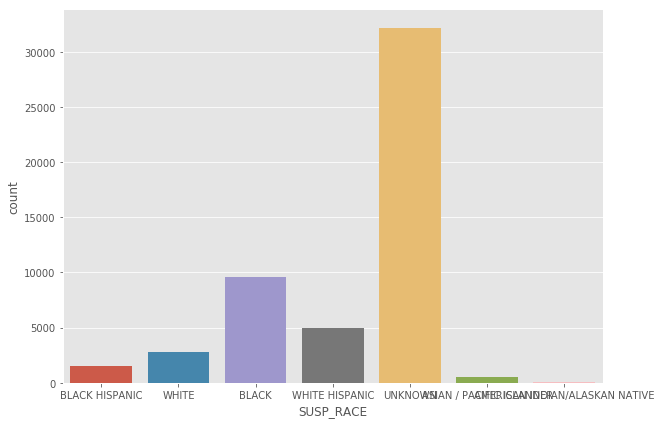

In [49]:
sns.catplot(x="SUSP_RACE", data=home_bur_NY, kind="count", height=6, aspect=1.5);

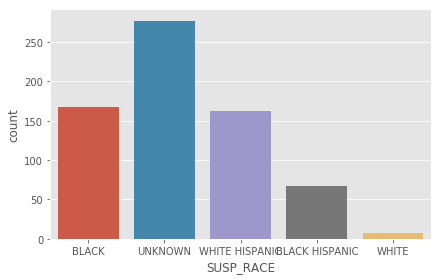

In [50]:
sns.catplot(x="SUSP_RACE", data=home_bur_44, kind="count", height=4, aspect=1.5);

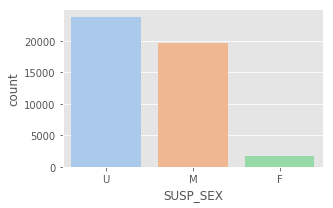

In [51]:
sns.catplot(x="SUSP_SEX", data=home_bur_NY, kind="count", height=3, aspect=1.5, palette="pastel");

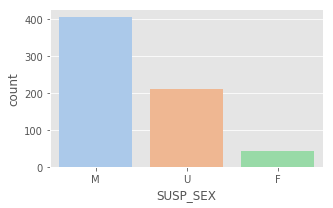

In [52]:
sns.catplot(x="SUSP_SEX", data=home_bur_44, kind="count", height=3, aspect=1.5, palette="pastel");

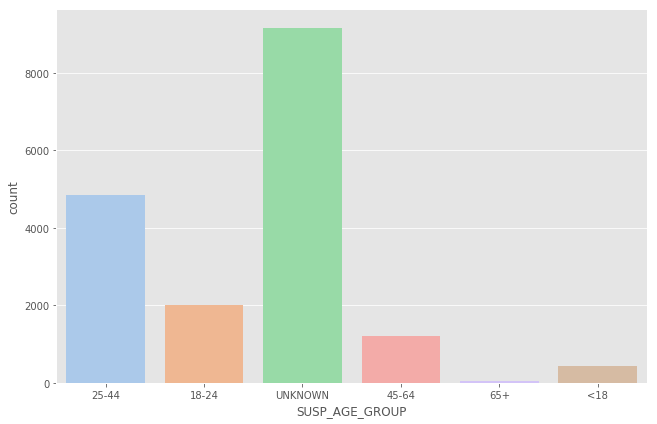

In [53]:
sns.catplot(x="SUSP_AGE_GROUP", data=home_bur_NY, kind="count", height=6, aspect=1.5, palette="pastel");

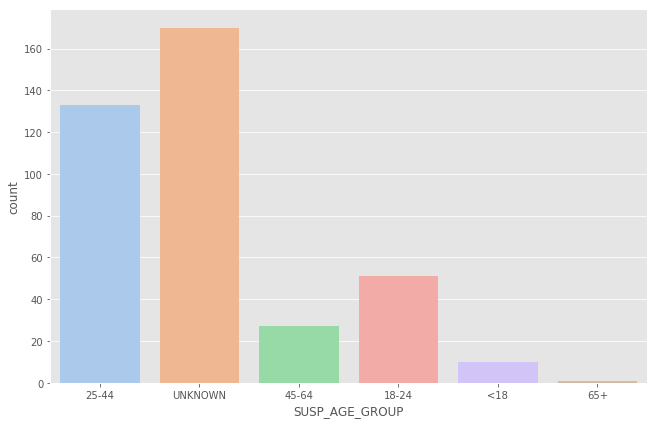

In [54]:
sns.catplot(x="SUSP_AGE_GROUP", data=home_bur_44, kind="count", height=6, aspect=1.5, palette="pastel");

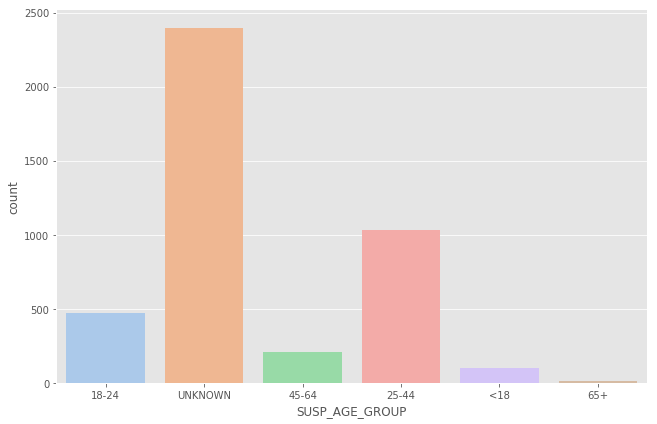

In [55]:
sns.catplot(x="SUSP_AGE_GROUP", data=Queens, kind="count", height=6, aspect=1.5, palette="pastel");

We see that the most difficult in this regard is a group of men in 25-45 age group.<br>
It should be emphasized, that we analyzed only home burglaries

<Figure size 720x504 with 0 Axes>

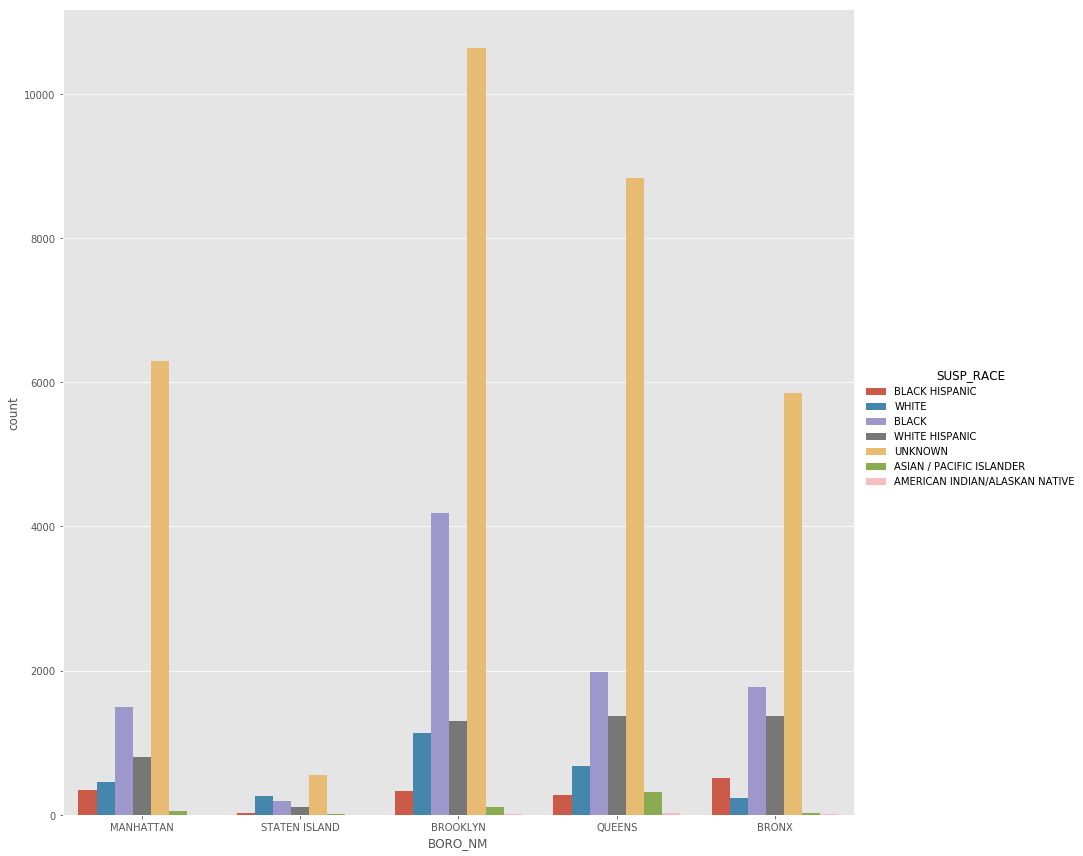

In [56]:
fig = plt.figure(figsize=(10,7))
ax = sns.catplot(x="BORO_NM", hue="SUSP_RACE", kind="count",data=home_bur_NY, height=12)

<Figure size 432x504 with 0 Axes>

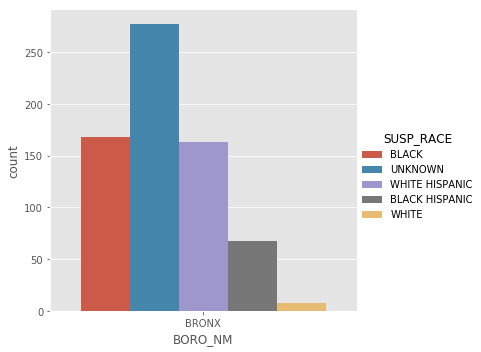

In [57]:
fig = plt.figure(figsize=(6,7))
ax = sns.catplot(x="BORO_NM", hue="SUSP_RACE", kind="count",data=home_bur_44, height=5)

In [58]:
home_bur_NY.drop([ 'SUSP_AGE_GROUP','SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'], inplace=True, axis=1)

In [59]:
home_bur_44.drop(['SUSP_AGE_GROUP','SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'], inplace=True, axis=1)

[Up to the header](#up)

### <a id='Daytime'>2.3  Daytime analysis</a>

In [60]:
home_bur_NY['Crime_date'] = pd.to_datetime(home_bur_NY['CMPLNT_TO_DT'],  format='%m/%d/%Y', errors='coerce')

In [61]:
home_bur_44['Crime_date'] = pd.to_datetime(home_bur_44['CMPLNT_TO_DT'],  format='%m/%d/%Y', errors='coerce')

In [62]:
home_bur_NY.Crime_date.min(), home_bur_NY.Crime_date.max()

(Timestamp('2000-09-19 00:00:00'), Timestamp('2018-12-31 00:00:00'))

In [63]:
home_bur_44.Crime_date.min(), home_bur_44.Crime_date.max()

(Timestamp('2005-11-11 00:00:00'), Timestamp('2018-12-17 00:00:00'))

In [64]:
home_bur_NY['month'] = home_bur_NY['Crime_date'].dt.month 
home_bur_NY['day'] = home_bur_NY['Crime_date'].dt.day
home_bur_NY['dw'] = home_bur_NY['Crime_date'].dt.dayofweek
home_bur_NY['dy'] = home_bur_NY['Crime_date'].dt.dayofyear
home_bur_NY['year'] = home_bur_NY['Crime_date'].dt.year
home_bur_NY.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,...,Latitude,Longitude,Lat_Lon,PATROL_BORO,Crime_date,month,day,dw,dy,year
0,679870027,12/31/2018,04:30:00,12/31/2018,04:35:00,34.0,12/31/2018,223,"BURGLARY,RESIDENCE,NIGHT",ATTEMPTED,...,40.853659,-73.935745,"(40.853658996, -73.935745043)",PATROL BORO MAN NORTH,2018-12-31,12,31,0,365,2018
1,861311307,12/31/2018,19:45:00,12/31/2018,19:50:00,120.0,12/31/2018,223,"BURGLARY,RESIDENCE,NIGHT",COMPLETED,...,40.621006,-74.098039,"(40.621006434, -74.098038517)",PATROL BORO STATEN ISLAND,2018-12-31,12,31,0,365,2018
2,908148337,12/31/2018,02:50:00,12/31/2018,NaN,90.0,12/31/2018,223,"BURGLARY,RESIDENCE,NIGHT",COMPLETED,...,40.704207,-73.950738,"(40.704207255, -73.950737797)",PATROL BORO BKLYN NORTH,2018-12-31,12,31,0,365,2018
3,612305910,12/31/2018,09:30:00,12/31/2018,10:50:00,105.0,12/31/2018,221,"BURGLARY,RESIDENCE,DAY",COMPLETED,...,40.708925,-73.747234,"(40.708924781, -73.747234264)",PATROL BORO QUEENS SOUTH,2018-12-31,12,31,0,365,2018
4,585990858,12/31/2018,12:00:00,12/31/2018,15:05:00,47.0,12/31/2018,221,"BURGLARY,RESIDENCE,DAY",COMPLETED,...,40.894634,-73.858395,"(40.894634176, -73.858395352)",PATROL BORO BRONX,2018-12-31,12,31,0,365,2018


In [65]:
home_bur_44['month'] = home_bur_44['Crime_date'].dt.month 
home_bur_44['day'] = home_bur_44['Crime_date'].dt.day
home_bur_44['dw'] = home_bur_44['Crime_date'].dt.dayofweek
home_bur_44['dy'] = home_bur_44['Crime_date'].dt.dayofyear
home_bur_44['year'] = home_bur_44['Crime_date'].dt.year
home_bur_44.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,...,Latitude,Longitude,Lat_Lon,PATROL_BORO,Crime_date,month,day,dw,dy,year
0,655214992,12/17/2018,20:30:00,12/17/2018,NaN,12/17/2018,223,"BURGLARY,RESIDENCE,NIGHT",COMPLETED,FELONY,...,40.831581,-73.927708,"(40.831581289, -73.927708067)",PATROL BORO BRONX,2018-12-17,12,17,0,351,2018
1,555518816,12/16/2018,19:50:00,12/16/2018,19:55:00,12/16/2018,223,"BURGLARY,RESIDENCE,NIGHT",COMPLETED,FELONY,...,40.842979,-73.914580,"(40.842979335, -73.914579729)",PATROL BORO BRONX,2018-12-16,12,16,6,350,2018
2,996954795,12/12/2018,02:56:00,12/12/2018,04:11:00,12/12/2018,223,"BURGLARY,RESIDENCE,NIGHT",COMPLETED,FELONY,...,40.834503,-73.913373,"(40.834502766, -73.91337278)",PATROL BORO BRONX,2018-12-12,12,12,2,346,2018
3,314628661,12/12/2018,02:56:00,12/12/2018,04:11:00,12/12/2018,223,"BURGLARY,RESIDENCE,NIGHT",COMPLETED,FELONY,...,40.834503,-73.913373,"(40.834502766, -73.91337278)",PATROL BORO BRONX,2018-12-12,12,12,2,346,2018
4,880908751,12/08/2018,04:30:00,12/08/2018,NaN,12/08/2018,223,"BURGLARY,RESIDENCE,NIGHT",ATTEMPTED,FELONY,...,40.843714,-73.917503,"(40.8437143, -73.91750271)",PATROL BORO BRONX,2018-12-08,12,8,5,342,2018


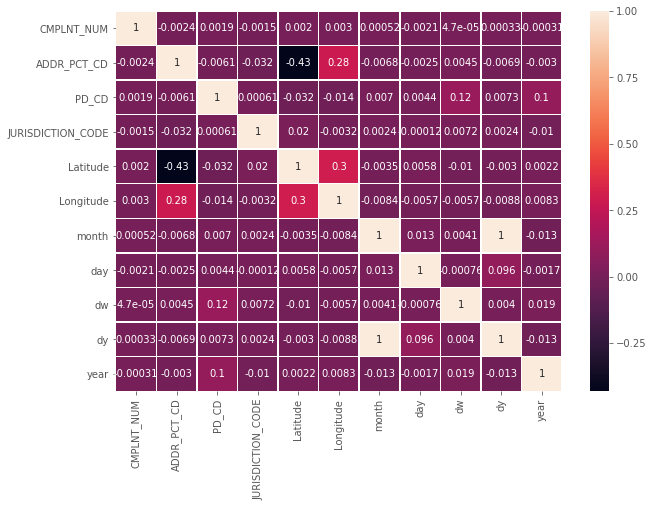

In [66]:
f,axa = plt.subplots(1,1,figsize=(10, 7))
sns.heatmap(home_bur_NY.corr(),annot=True, linewidths='0.5')

Text(0, 0.5, 'Number of home burglaries')

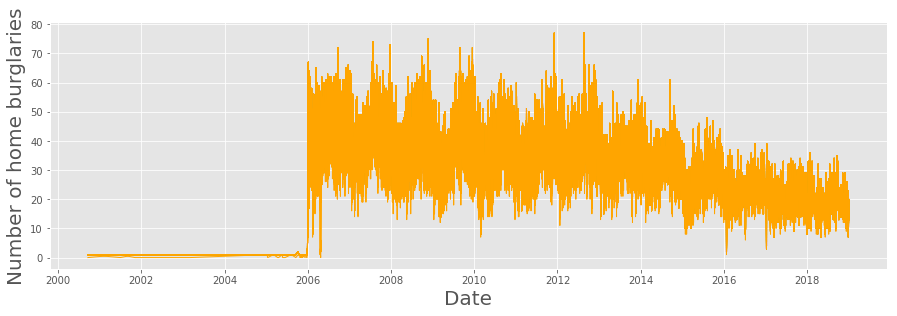

In [67]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(211)
temp = home_bur_NY.groupby(['Crime_date']).count()
ax1.plot(temp,'orange',linewidth=1)
ax1.set_xlabel('Date',fontsize=20)
ax1.set_ylabel('Number of home burglaries',fontsize=20)

Text(0, 0.5, 'Number of home burglaries')

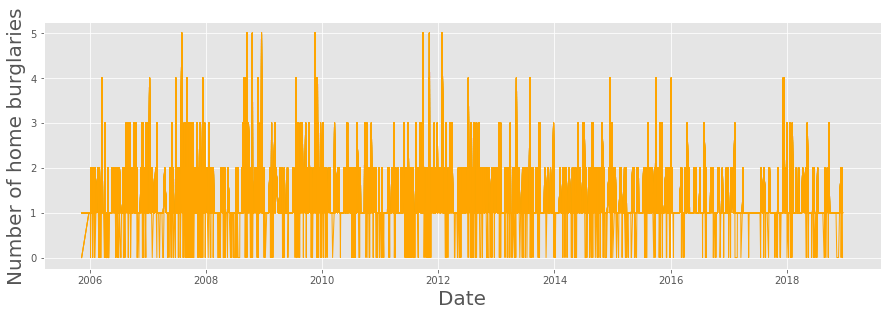

In [69]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(211)
temp1 = home_bur_44.groupby(['Crime_date']).count()
ax1.plot(temp1,'orange',linewidth=1)
ax1.set_xlabel('Date',fontsize=20)
ax1.set_ylabel('Number of home burglaries',fontsize=20)

It is clear that the time of the crime and its disclosure time can be very different therefore we will limit by time of the test and training data-set.

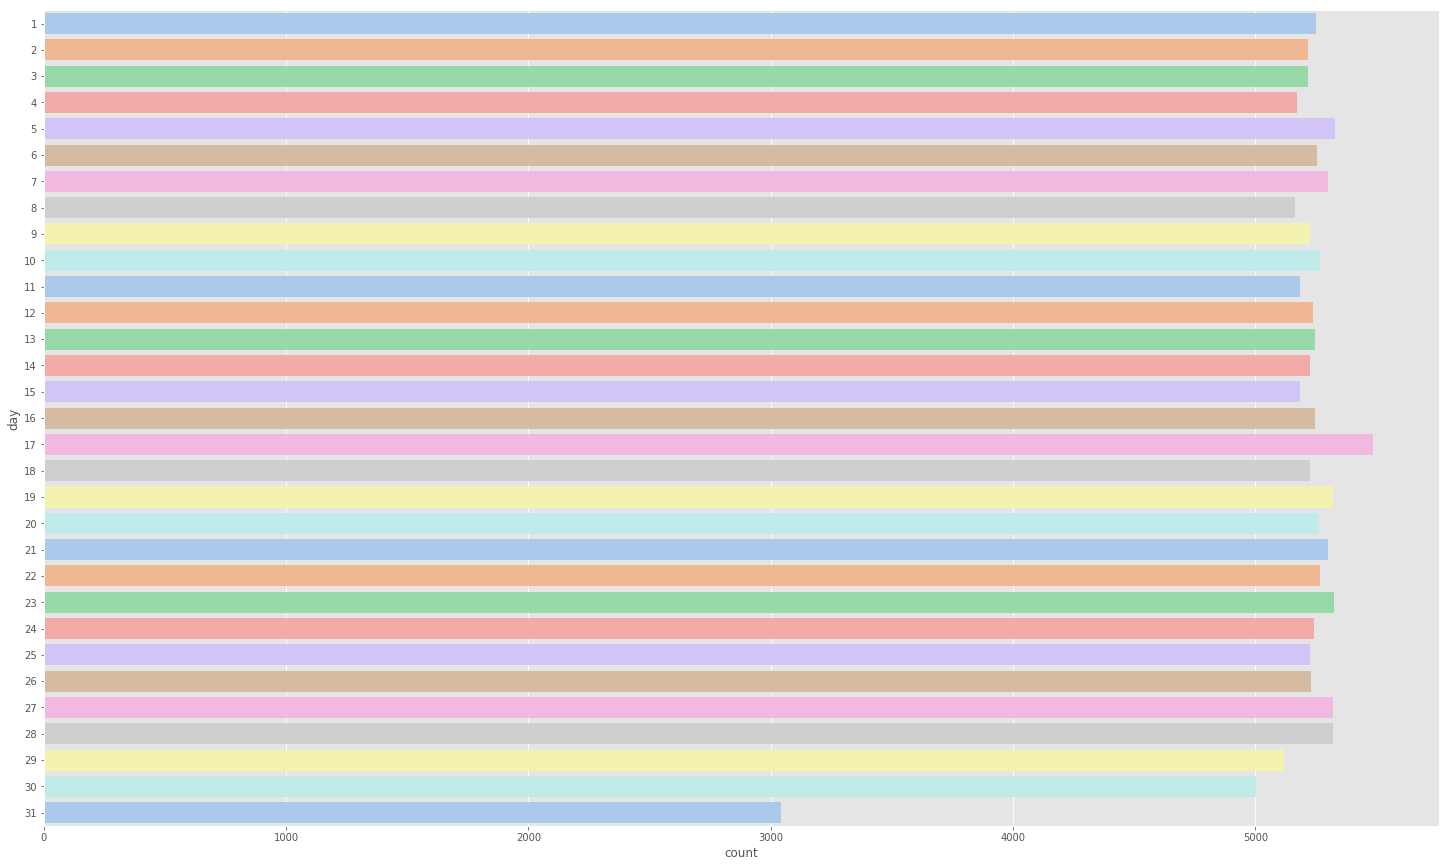

In [70]:
f, ax = plt.subplots(figsize=(25, 15))
sns.countplot(y="day", data=home_bur_NY, palette="pastel");

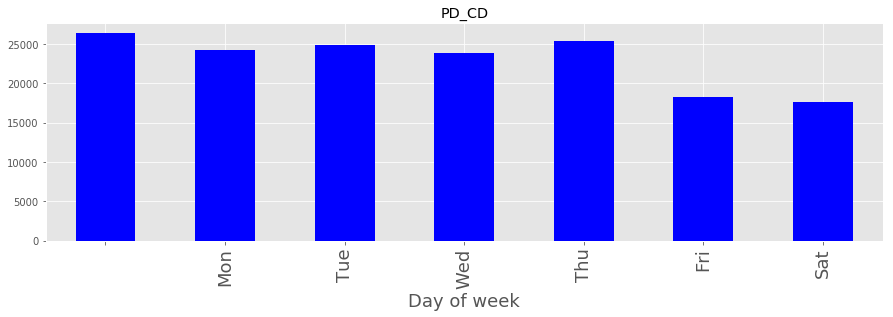

In [71]:
fig = plt.figure(figsize=(15,10))
ax4 = fig.add_subplot(212) 
day_p=home_bur_NY.groupby("dw").count()['PD_CD']
day_p.plot(kind='bar', color='blue', figsize=(10,5), legend=None, 
           subplots=True, ax=ax4, use_index=False, linewidth=3)

plt.xlabel("Day of week",fontsize=18)
ax4.set_xticklabels(['','Mon','Tue','Wed','Thu','Fri','Sat','Sun'],fontsize=18)
plt.subplots_adjust(wspace=0.1, hspace=0.5)

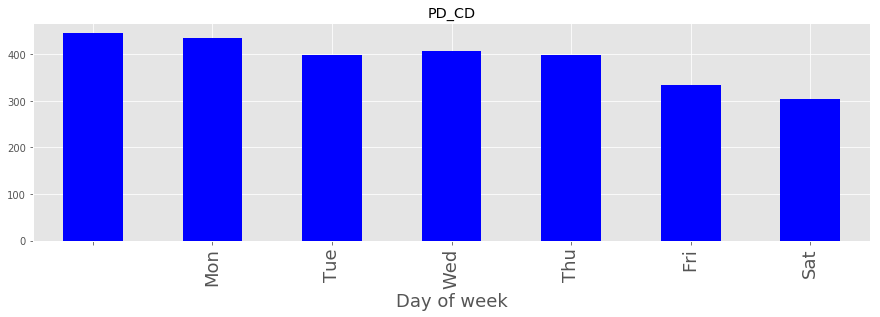

In [72]:
fig = plt.figure(figsize=(15,10))
ax4 = fig.add_subplot(212)
day_p=home_bur_44.groupby("dw").count()['PD_CD']
day_p.plot(kind='bar', color='blue', figsize=(10,5), legend=None, 
           subplots=True, ax=ax4, use_index=False, linewidth=3)

plt.xlabel("Day of week",fontsize=18)
ax4.set_xticklabels(['','Mon','Tue','Wed','Thu','Fri','Sat','Sun'],fontsize=18)
plt.subplots_adjust(wspace=0.1, hspace=0.5)

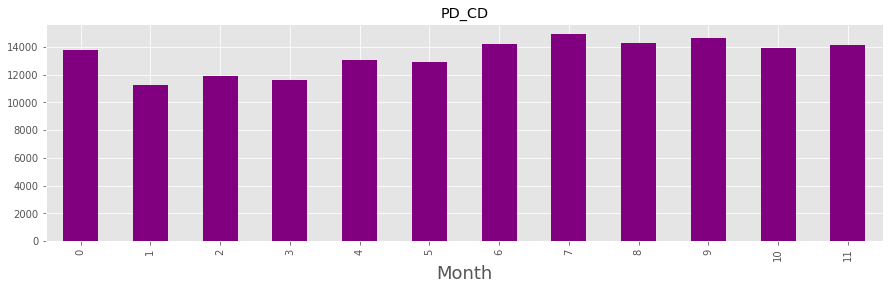

In [73]:
fig = plt.figure(figsize=(15,10))
ax4 = fig.add_subplot(212)

day_p=home_bur_NY.groupby("month").count()['PD_CD']
day_p.plot(kind='bar', color='purple', figsize=(10,5), legend=None, 
           subplots=True, ax=ax4, use_index=False, linewidth=3)
plt.xlabel("Month",fontsize=18)
plt.subplots_adjust(wspace=0.1, hspace=0.5)

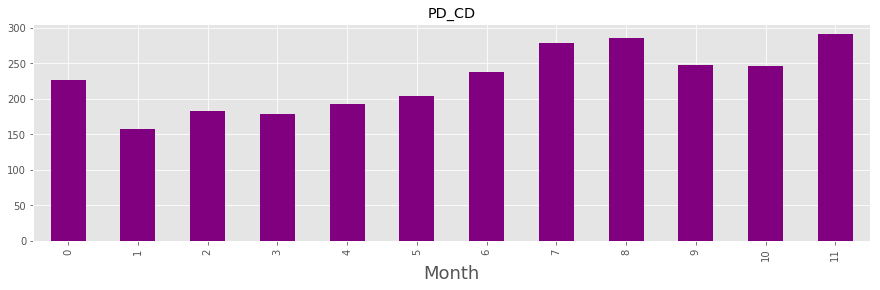

In [74]:
fig = plt.figure(figsize=(15,10))
ax4 = fig.add_subplot(212)
day_p=home_bur_44.groupby("month").count()['PD_CD']
day_p.plot(kind='bar', color='purple', figsize=(10,5), legend=None, 
           subplots=True, ax=ax4, use_index=False, linewidth=3)

plt.xlabel("Month",fontsize=18)
plt.subplots_adjust(wspace=0.1, hspace=0.5)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BB0CF436D8>],
      dtype=object)

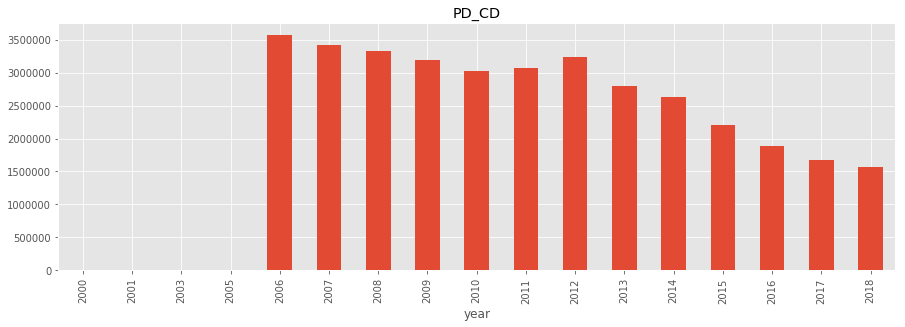

In [75]:
fig = plt.figure(figsize=(15,10))

ax3 = fig.add_subplot(211)
a = home_bur_NY.groupby(['year']).sum()['PD_CD']
a.plot(kind='bar', width=0.5, figsize=(10,5), legend=None, 
       subplots=True, ax=ax3, title=None)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BB0DE8A4A8>],
      dtype=object)

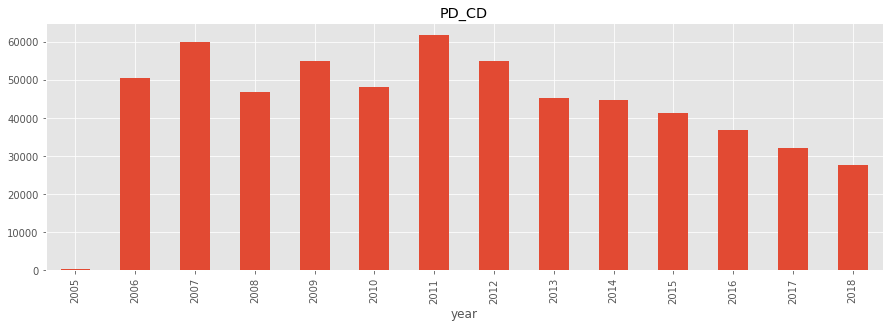

In [76]:
fig = plt.figure(figsize=(15,10))

ax3 = fig.add_subplot(211)
a = home_bur_44.groupby(['year']).sum()['PD_CD']
a.plot(kind='bar', width=0.5, figsize=(10,5), legend=None, 
       subplots=True, ax=ax3, title=None)

In [77]:
#home_bur_NY.index = pd.DatetimeIndex(home_bur_NY.CMPLNT_TO_DT)

Text(0, 0.5, 'Number of Crimes')

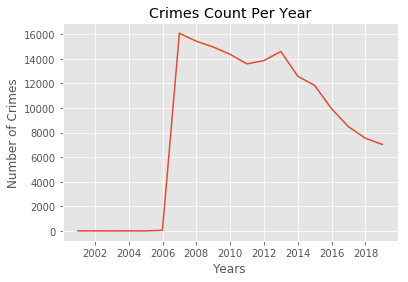

In [101]:
plt.plot(home_bur_NY.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

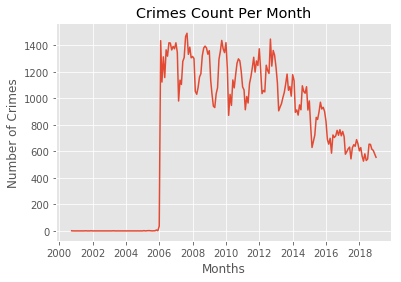

In [102]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(home_bur_NY.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

We can notice that the month or day of the week does not greatly affect the average number of attacks, but with each year the total number decreases.

[Up to the header](#up)

In [96]:
Data = home_bur_NY[(home_bur_NY['Crime_date'] >='2006-01-01') & (home_bur_NY['Crime_date'] <'2018-04-01')]
Data.head()

,CMPLNT_NUM,ADDR_PCT_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,Latitude,Longitude,Lat_Lon,PATROL_BORO,Crime_date,month,day,dw,dy,year
5268,479939731,83.0,"BURGLARY,RESIDENCE,DAY",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,40.694791,-73.926244,"(40.694790591, -73.926244422)",PATROL BORO BKLYN NORTH,2018-03-31,3,31,5,90,2018
5269,363411847,77.0,"BURGLARY,RESIDENCE,NIGHT",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,40.672261,-73.965030,"(40.672260603, -73.965029797)",PATROL BORO BKLYN NORTH,2018-03-31,3,31,5,90,2018
5271,206569444,77.0,"BURGLARY,RESIDENCE,DAY",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,40.672261,-73.965030,"(40.672260603, -73.965029797)",PATROL BORO BKLYN NORTH,2018-03-31,3,31,5,90,2018
5272,656107443,115.0,"BURGLARY,RESIDENCE,NIGHT",COMPLETED,FELONY,QUEENS,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,40.751867,-73.893221,"(40.751866686, -73.893221445)",PATROL BORO QUEENS NORTH,2018-03-31,3,31,5,90,2018
5273,622935108,25.0,"BURGLARY,RESIDENCE,DAY",COMPLETED,FELONY,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,40.798160,-73.938403,"(40.798159532, -73.938402699)",PATROL BORO MAN NORTH,2018-03-31,3,31,5,90,2018


In [97]:
Data_44 = home_bur_44[(home_bur_NY['Crime_date'] >='2006-01-01') & (home_bur_44['Crime_date'] <'2018-04-01')]
Data_44.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,...,Latitude,Longitude,Lat_Lon,PATROL_BORO,Crime_date,month,day,dw,dy,year
76,403793268,03/30/2018,22:00:00,03/30/2018,22:11:00,03/31/2018,223,"BURGLARY,RESIDENCE,NIGHT",COMPLETED,FELONY,...,40.825844,-73.925919,"(40.825843698, -73.925918502)",PATROL BORO BRONX,2018-03-30,3,30,4,89,2018
79,736568480,03/28/2018,09:30:00,03/28/2018,21:00:00,03/29/2018,221,"BURGLARY,RESIDENCE,DAY",COMPLETED,FELONY,...,40.838174,-73.927354,"(40.838173866, -73.927353964)",PATROL BORO BRONX,2018-03-28,3,28,2,87,2018
80,126350784,03/24/2018,04:35:00,03/24/2018,06:40:00,03/24/2018,221,"BURGLARY,RESIDENCE,DAY",COMPLETED,FELONY,...,40.834759,-73.927390,"(40.834759468, -73.927390216)",PATROL BORO BRONX,2018-03-24,3,24,5,83,2018
81,249425385,03/23/2018,08:30:00,03/23/2018,16:50:00,03/23/2018,221,"BURGLARY,RESIDENCE,DAY",COMPLETED,FELONY,...,40.840003,-73.924331,"(40.840002644, -73.924330627)",PATROL BORO BRONX,2018-03-23,3,23,4,82,2018
82,252670311,03/16/2018,21:30:00,03/16/2018,NaN,03/17/2018,223,"BURGLARY,RESIDENCE,NIGHT",COMPLETED,FELONY,...,40.831439,-73.920163,"(40.831439076, -73.920163069)",PATROL BORO BRONX,2018-03-16,3,16,4,75,2018


In [85]:
Data.shape

(155037, 26)

In [86]:
home_bur_NY.shape

(160414, 26)

In [87]:
Data.Crime_date.min(), Data.Crime_date.max()

(Timestamp('2006-01-01 00:00:00'), Timestamp('2018-03-31 00:00:00'))

In [98]:
Data_44.Crime_date.min(), Data_44.Crime_date.max()

(Timestamp('2005-11-11 00:00:00'), Timestamp('2018-03-30 00:00:00'))

In [99]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155037 entries, 5268 to 160413
Data columns (total 20 columns):
CMPLNT_NUM           155037 non-null int64
ADDR_PCT_CD          155014 non-null float64
PD_DESC              155037 non-null object
CRM_ATPT_CPTD_CD     155037 non-null object
LAW_CAT_CD           155037 non-null object
BORO_NM              154900 non-null object
LOC_OF_OCCUR_DESC    154435 non-null object
PREM_TYP_DESC        154748 non-null object
JURIS_DESC           155037 non-null object
JURISDICTION_CODE    155037 non-null int64
Latitude             154554 non-null float64
Longitude            154554 non-null float64
Lat_Lon              154554 non-null object
PATROL_BORO          155013 non-null object
Crime_date           155037 non-null datetime64[ns]
month                155037 non-null int64
day                  155037 non-null int64
dw                   155037 non-null int64
dy                   155037 non-null int64
year                 155037 non-null int64
dt

In [101]:
Data_44.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2648 entries, 76 to 2725
Data columns (total 19 columns):
CMPLNT_NUM           2648 non-null int64
PD_DESC              2648 non-null object
CRM_ATPT_CPTD_CD     2648 non-null object
LAW_CAT_CD           2648 non-null object
BORO_NM              2645 non-null object
LOC_OF_OCCUR_DESC    2640 non-null object
PREM_TYP_DESC        2647 non-null object
JURIS_DESC           2648 non-null object
JURISDICTION_CODE    2648 non-null int64
Latitude             2639 non-null float64
Longitude            2639 non-null float64
Lat_Lon              2639 non-null object
PATROL_BORO          2648 non-null object
Crime_date           2648 non-null datetime64[ns]
month                2648 non-null int64
day                  2648 non-null int64
dw                   2648 non-null int64
dy                   2648 non-null int64
year                 2648 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(7), object(9)
memory usage: 413.8+ KB


In [94]:
Data.drop(['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM','RPT_DT','PD_CD'], inplace=True, axis=1)

In [100]:
Data_44.drop(['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM','RPT_DT','PD_CD'], inplace=True, axis=1)

In [2]:
Data.to_csv(r'C:\Users\Katy\Downloads\Home_Task_Localize\Data.csv')

In [103]:
Data_44.to_csv(r'C:\Users\Katy\Downloads\Home_Task_Localize\Data_44.csv')

[Up to the header](#up)